In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/FPS_hw_x_df_x_taxi.xlsx')
df

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1
...,...,...,...,...,...,...
1995,918581,5,21.704595,8.590702,Delivery,1
1996,918656,7,27.587379,30.834933,Comfort,1
1997,918683,4,16.827856,20.365287,Delivery,0
1998,918737,2,18.979144,14.959835,Economy,0


Описание датасета:
Датасет содержит информацию о поездках на такси одного из известных агрегаторов.

order_gk – Идентификатор поездки

weekday_key – День недели совершения поездки

hour_key – Час совершения поездки

distance_km – Дистанция поездки

offer_class_group – Класс поездки (Economy; Comfort; Premium; Delivery)

driver_response – Статус поездки (1 – поездка совершена; 0 – отмена)

In [ ]:
# Разделяем данные на Econom и Comfort
df_economy = df[df['offer_class_group'] == 'Economy']
df_comfort = df[df['offer_class_group'] == 'Comfort']

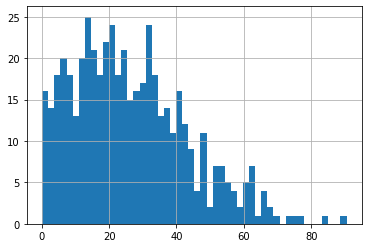

In [ ]:
# График плоности распределения дистанций поездок для Economy
df_economy['distance_km'].hist(bins=50)

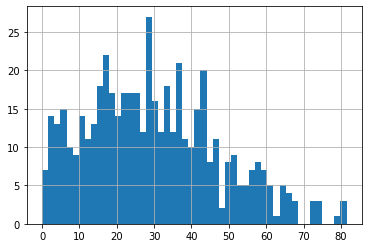

In [ ]:
# График плоности распределения дистанций поездок для Comfort
df_comfort['distance_km'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


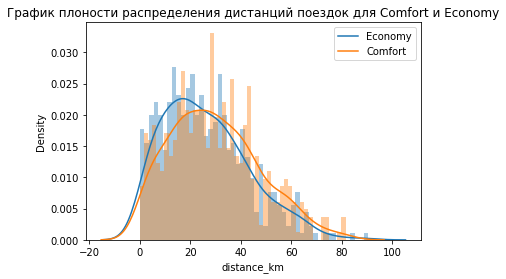

In [ ]:
sns.distplot(df_economy['distance_km'], 50)
sns.distplot(df_comfort['distance_km'], 50)
plt.title('График плоности распределения дистанций поездок для Comfort и Economy')
plt.legend(['Economy', 'Comfort'])


In [ ]:
from scipy.stats import ttest_ind
alpha = 0.05

Проверяем гипотезу: “На дальние поездки, пользователи предпочитают Economy-классу более комфортные условия поездки – Comfort-класс”.

H1 - "На дальние поездки, пользователи предпочитают Economy и Comfort классы НЕ одинаково "

Mcomfort != Meconomy

H0 - “На дальние поездки, пользователи предпочитают Economy и Comfort классы одинаково”.

Mcomfort = Meconomy

In [ ]:
result = ttest_ind(df_economy['distance_km'], df_comfort['distance_km'])
print(result.pvalue)
print(result)


if (result.pvalue < alpha):
  print(f'Отвергаем нулевую гипотезу, {result.pvalue} < {alpha}')
else:
  print(f'Не отвергаем нулевую гипотезу, {result.pvalue} >= {alpha}')


0.0015675100297112708
Ttest_indResult(statistic=-3.1706184453513386, pvalue=0.0015675100297112708)
Отвергаем нулевую гипотезу, 0.0015675100297112708 < 0.05


# А что если так ...

Я предполагаю что нужно бы разбить наши датафреймы по дальним дистанциям...
Я буду считать дальней поездкой поездку больше чем на 30 км например ...

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


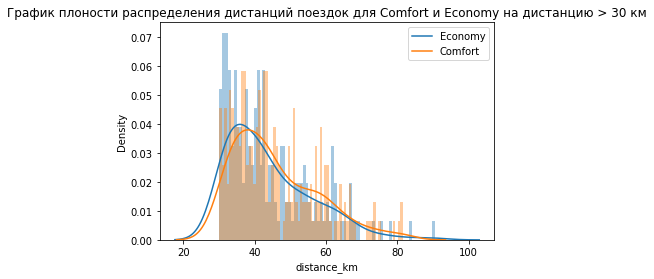

In [ ]:
df_ec_long = df_economy[df_economy['distance_km'] > 30]
df_co_long = df_comfort[df_comfort['distance_km'] > 30]
sns.distplot(df_ec_long['distance_km'], 75)
sns.distplot(df_co_long['distance_km'], 75)
plt.title('График плоности распределения дистанций поездок для Comfort и Economy на дистанцию > 30 км')
plt.legend(['Economy', 'Comfort'])

H0 - “На дальние поездки, пользователи предпочитают Economy и Comfort классы одинаково”.

In [ ]:
result = ttest_ind(df_ec_long['distance_km'], df_co_long['distance_km'])
print(result.pvalue)

if (result.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Не отвергаем нулевую гипотезу')


0.13217153071988325
Не отвергаем нулевую гипотезу
